Nome: Ricardo Cabral Penteado - NUSP: 13813331

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import seaborn as sns
import seaborn as sns
import nltk
nltk.download('punkt')
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import GlobalMaxPooling1D
from keras.src.callbacks import learning_rate_schedule
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.regularizers import l1, l2, l1_l2
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from gensim.models import KeyedVectors
from preprocessing import clean_text
from keras.initializers import GlorotNormal


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
pip install -r /content/requirements\ \(1\).txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) 

In [3]:
pip install gensim==4.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.3.2:
      Successfully uninstalled gensim-4.3.2


Importando os dados

In [62]:
df = pd.read_csv('/content/B2W-Reviews01.csv')

<ipython-input-62-83efbd32bbcd>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/B2W-Reviews01.csv')


In [5]:
display(df)

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132368,2018-05-31 23:30:50,15f20e95ff44163f3175aaf67a5ae4a94d5030b409e521...,17962233,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,NaN,Câmeras e Filmadoras,Acessórios para Câmeras e Filmadoras,Ótimo produto!,5,Yes,"Vale muito, estou usando no controle do Xbox e...",1988.0,M,RS
132369,2018-05-31 23:42:25,def7cf9028b0673ab8bca3b1d06e085461fafb88cd48d9...,132631701,Mop Giratório Fit + Refil Extra - At Home,NaN,Utilidades Domésticas,Material de Limpeza,Sensacional,5,Yes,"Prático e barato, super indico o produto para ...",1979.0,F,SP
132370,2018-05-31 23:44:16,7bcbf542f5d7dd9a9a192a6805adba7a7a4c1ce3bf00df...,16095859,Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...,NaN,Automotivo,Iluminação,Ótimo produto,4,Yes,Chegou antes do prazo previsto e corresponde a...,1979.0,F,PR
132371,2018-05-31 23:46:48,e6fb0b19277d01c2a300c7837a105f3c369377e92f9c19...,6774907,Etiquetas Jurídicas Vade Mecum - Marca Fácil,marca facil,Papelaria,Material de Escritório,O produto não é bom.,1,No,"Material fraco, poderia ser melhor. Ficou deve...",1991.0,M,RJ


In [6]:
df.describe()

,overall_rating,reviewer_birth_year
count,132373.000000,126389.000000
mean,3.492004,1977.495898
std,1.530289,21.895265
min,1.000000,59.000000
25%,2.000000,1969.000000
50%,4.000000,1980.000000
75%,5.000000,1987.000000
max,5.000000,2018.000000


   Count  Percentage
1  27369   20.675666
2   8389    6.337395
3  16315   12.325021
4  32345   24.434741
5  47955   36.227176


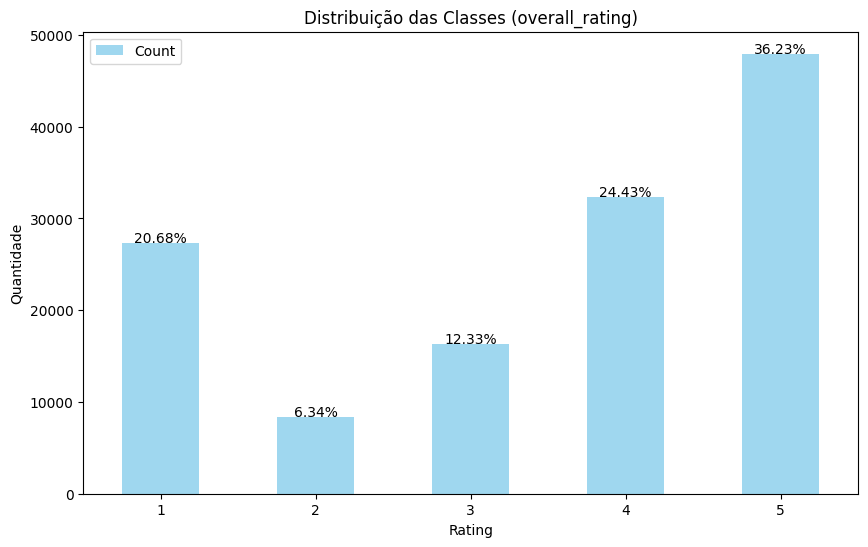

In [7]:
# Contando o número de cada 'overall_rating'
class_distribution = df['overall_rating'].value_counts().sort_index()

# Calculando a porcentagem de cada classe
class_percentage = (class_distribution / len(df['overall_rating'])) * 100

# Imprimindo a distribuição e porcentagem
combined_stats = pd.concat([class_distribution, class_percentage], axis=1)
combined_stats.columns = ['Count', 'Percentage']
print(combined_stats)

# Visualizando a distribuição das classes com porcentagem
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue', alpha=0.8, label='Count')
plt.title('Distribuição das Classes (overall_rating)')
plt.xlabel('Rating')
plt.ylabel('Quantidade')

# Adicionando porcentagens acima das barras
for i, (count, percentage) in enumerate(zip(class_distribution, class_percentage)):
    plt.text(i, count + 50, f'{percentage:.2f}%', ha='center')

plt.xticks(rotation=0)
plt.legend()
plt.show()



Pré-processamento

In [63]:
df = df[['review_text', 'overall_rating']]
display(df)

,review_text,overall_rating
0,Estou contente com a compra entrega rápida o ú...,4
1,"Por apenas R$1994.20,eu consegui comprar esse ...",4
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,4
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,4
4,"A entrega foi no prazo, as americanas estão de...",5
...,...,...
132368,"Vale muito, estou usando no controle do Xbox e...",5
132369,"Prático e barato, super indico o produto para ...",5
132370,Chegou antes do prazo previsto e corresponde a...,4
132371,"Material fraco, poderia ser melhor. Ficou deve...",1


In [64]:
df = df.dropna(subset=['review_text', 'overall_rating'])
display(df)

,review_text,overall_rating
0,Estou contente com a compra entrega rápida o ú...,4
1,"Por apenas R$1994.20,eu consegui comprar esse ...",4
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,4
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,4
4,"A entrega foi no prazo, as americanas estão de...",5
...,...,...
132368,"Vale muito, estou usando no controle do Xbox e...",5
132369,"Prático e barato, super indico o produto para ...",5
132370,Chegou antes do prazo previsto e corresponde a...,4
132371,"Material fraco, poderia ser melhor. Ficou deve...",1


In [65]:
df['review_text'] = df['review_text'].apply(clean_text)
display(df)

,review_text,overall_rating
0,estou contente com a compra entrega rápida o ú...,4
1,"por apenas r$0000.00,eu consegui comprar esse ...",4
2,supera em agilidade e praticidade outras panel...,4
3,meu filho amou ! parece de verdade com tantos ...,4
4,"a entrega foi no prazo , as americanas estão d...",5
...,...,...
132368,"vale muito , estou usando no controle do xbox ...",5
132369,"prático e barato , super indico o produto para...",5
132370,chegou antes do prazo previsto e corresponde a...,4
132371,"material fraco , poderia ser melhor . ficou de...",1


In [66]:
df = df[['review_text','overall_rating']]

In [73]:
train, temp = train_test_split(df, test_size=0.25)
valid, test = train_test_split(temp, test_size=(15/25))

train.to_csv('treinamento.csv')
valid.to_csv('validacao.csv')
test.to_csv('teste.csv')

In [74]:
# Print values
print("Train Data:")
print(train)
print("\nValidation Data:")
print(valid)
print("\nTest Data:")
print(test)

Train Data:
                                              review_text  overall_rating
126074  o tamanho é grande , porém bastante leve , tem...               4
71378   bom produto . prático , de qualidade e de preç...               5
108842  muito bom , coloquei na fonte e atendeu minhas...               5
63142   quem mora sozinho ou precisa de uma geladeira ...               5
117044  refil bom e dura 0 meses mesmo como fabricante...               4
...                                                   ...             ...
127813  entrega antes do prazo , produto perfeito . es...               5
49381   gostei do produto a entrega rápida e o produto...               4
28253   recomendo sempre americanas é sinal de credibi...               5
53970   não comprem . a qualidade é péssima , acho que...               1
101020  não recebi produto porque ??? já fiz várias av...               1

[96823 rows x 2 columns]

Validation Data:
                                              review_tex

In [75]:
# tamanho da maior sequência (ou revisão)
tammax = train['review_text'].apply(lambda x: len(str(x).split())).max()

# total de palavras únicas no dataframe
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['review_text'])
vocab_size = len(tokenizer.word_index)

print("Tamanho máximo de sequência:", tammax)
print("Tamanho do vocabulário:", vocab_size)


Tamanho máximo de sequência: 795
Tamanho do vocabulário: 43893


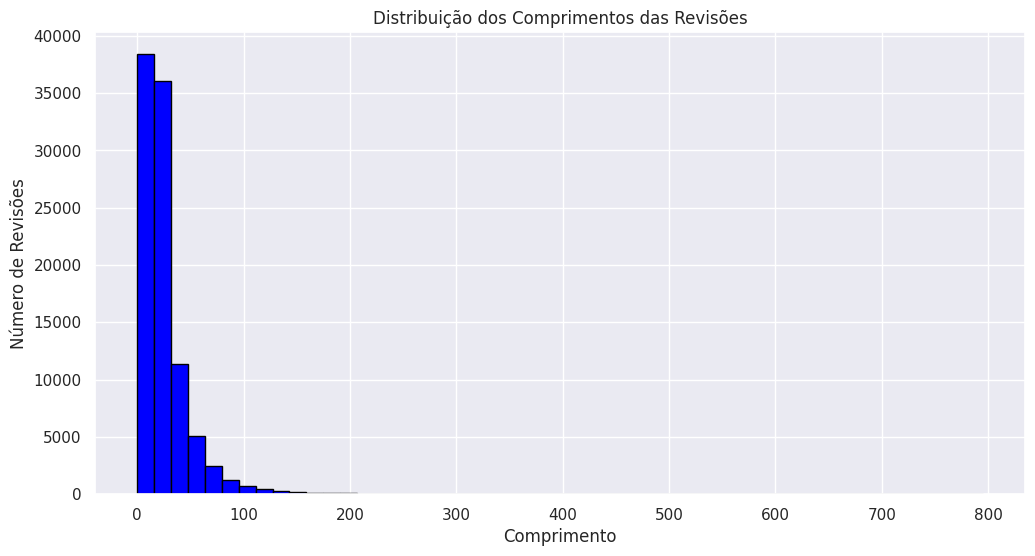

85% das revisões têm comprimento <= 41.0
90% das revisões têm comprimento <= 50.0
95% das revisões têm comprimento <= 69.0
99% das revisões têm comprimento <= 124.0
100% das revisões têm comprimento <= 795.0


In [76]:
# Calculando os comprimentos das revisões
lengths = train['review_text'].apply(lambda x: len(str(x).split()))

# Criando o histograma
plt.figure(figsize=(12, 6))
plt.hist(lengths, bins=50, color='blue', edgecolor='black')
plt.title('Distribuição dos Comprimentos das Revisões')
plt.xlabel('Comprimento')
plt.ylabel('Número de Revisões')
plt.show()

# Calculando percentis para ajudar a decidir sobre tammax
for percentile in [85, 90, 95, 99, 100]:
    value = lengths.quantile(percentile / 100)
    print(f"{percentile}% das revisões têm comprimento <= {value}")


In [18]:
emb = "/content/drive/My Drive/Embeddings/glove_s300.txt"
model1 = KeyedVectors.load_word2vec_format(emb)

In [77]:
# Hyperparameters
tammax = 124
batch_size = 64
vocab_size = 20000

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train['review_text'])
train_sequences = tokenizer.texts_to_sequences(train['review_text'])
valid_sequences = tokenizer.texts_to_sequences(valid['review_text'])

X_train = pad_sequences(train_sequences, maxlen=tammax)
X_valid = pad_sequences(valid_sequences, maxlen=tammax)

y_train = to_categorical(train['overall_rating'] - 1, 5)
y_valid = to_categorical(valid['overall_rating'] - 1, 5)

embedding_dimension = 300

embedding_matrix = np.zeros((vocab_size, embedding_dimension))

for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        try:
            embedding_vector = model1[word]
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
        except KeyError:
            pass


Treinamento
MODELOS - LSTM Unidirecional e Bidirecional

In [85]:
def create_model(bidirectional=False, dropout_rate=0.0):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dimension, input_length=tammax, weights=[embedding_matrix], trainable=False))

    if bidirectional:
        model.add(Bidirectional(LSTM(64, return_sequences=False)))
    else:
        model.add(LSTM(64, return_sequences=False))

    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [83]:
def create_model(bidirectional=False, dropout_rate=0.0):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dimension, input_length=tammax, weights=[embedding_matrix], trainable=False))

    if bidirectional:
        model.add(Bidirectional(LSTM(64, return_sequences=False)))
    else:
        model.add(LSTM(64, return_sequences=False))

    model.add(Dense(5, activation='softmax'))
    model.add(Dropout(dropout_rate))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [86]:
cv_scores = []
history_list = []

for bidir in [False, True]:
    for dropout_rate in [0.0, 0.25, 0.5]:
        model = create_model(bidirectional=bidir, dropout_rate=dropout_rate)
        # Sumário do Modelo
        print("Model Summary for bidirectional={}, dropout_rate={}".format(bidir, dropout_rate))
        model.summary()
        print("\n\n")

        # Plotagem do Modelo
        tf.keras.utils.plot_model(
            model,
            to_file='model_{}_{}.png'.format(bidir, dropout_rate),
            show_shapes=True,
            show_dtype=True,
            show_layer_names=True,
            rankdir='LR',
            expand_nested=True,
            dpi=96,
            show_layer_activations=True,
            show_trainable=True
        )
        data_path = "/content/drive/My Drive/"
        checkpoint = ModelCheckpoint(data_path+f'best_model_{bidir}_{dropout_rate}.model', monitor='val_loss', save_best_only=True, verbose=1)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
        early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='min')

        history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=batch_size, callbacks=[checkpoint, early_stopping, reduce_lr])
        history_list.append((bidir, dropout_rate, history))
        train_acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']

        scores = model.evaluate(X_valid, y_valid, verbose=0)
        print(f"Loss: {scores[0]} - Accuracy: {scores[1]}\n")
        cv_scores.append((bidir, dropout_rate, scores[0], scores[1]))

# Create DataFrame
df_cv = pd.DataFrame(cv_scores, columns=['Bidirectional', 'Dropout Rate', 'Validation Loss', 'Validation Accuracy'])
print(df_cv)


Model Summary for bidirectional=False, dropout_rate=0.0
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 124, 300)          6000000   
                                                                 
 lstm_32 (LSTM)              (None, 64)                93440     
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 5)                 325       
                                                                 
Total params: 6093765 (23.25 MB)
Trainable params: 93765 (366.27 KB)
Non-trainable params: 6000000 (22.89 MB)
_________________________________________________________________



Epoch 1/100
1510/1513 [============================>.] - ETA: 0s - loss: 1.0003 - 

In [87]:
display(df_cv)

,Bidirectional,Dropout Rate,Validation Loss,Validation Accuracy
0,False,0.00,0.993144,0.588846
1,False,0.25,0.938578,0.611851
2,False,0.50,0.909374,0.608443
3,True,0.00,0.973803,0.594191
4,True,0.25,0.967856,0.603950
5,True,0.50,0.920889,0.610922


Plotando informações importantes

Para o modelo Unidirectional LSTM with 0.0% Dropout:
    Melhor época: 4
    Perda de validação na melhor época: 0.8871836066246033
--------------------------------------


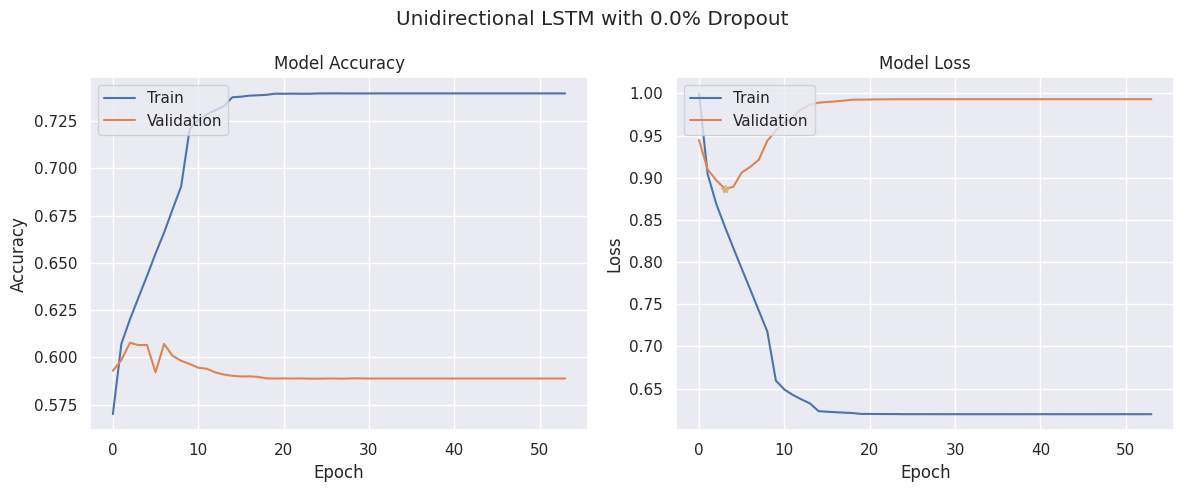

Para o modelo Unidirectional LSTM with 25.0% Dropout:
    Melhor época: 4
    Perda de validação na melhor época: 0.8822905421257019
--------------------------------------


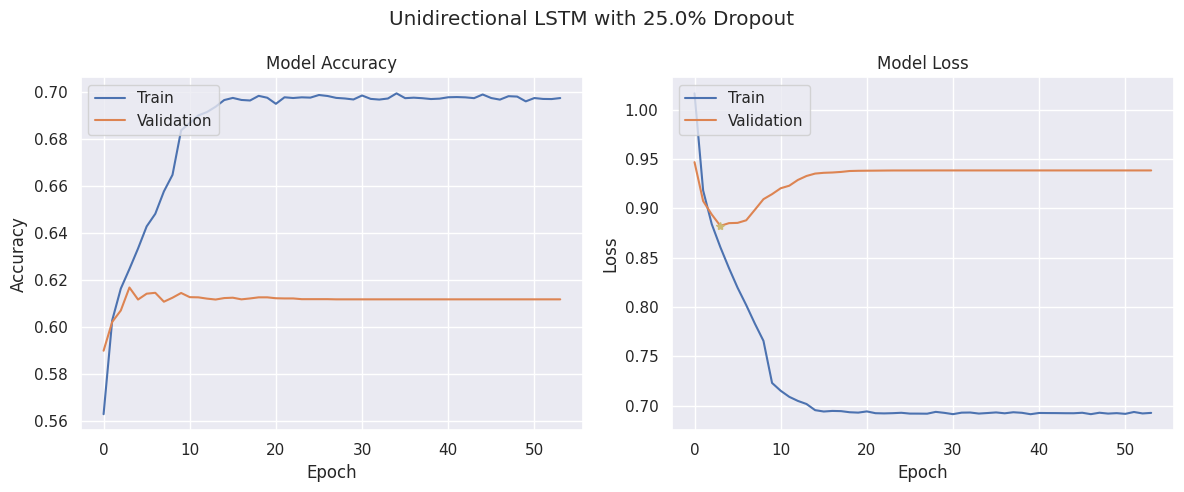

Para o modelo Unidirectional LSTM with 50.0% Dropout:
    Melhor época: 4
    Perda de validação na melhor época: 0.8901072144508362
--------------------------------------


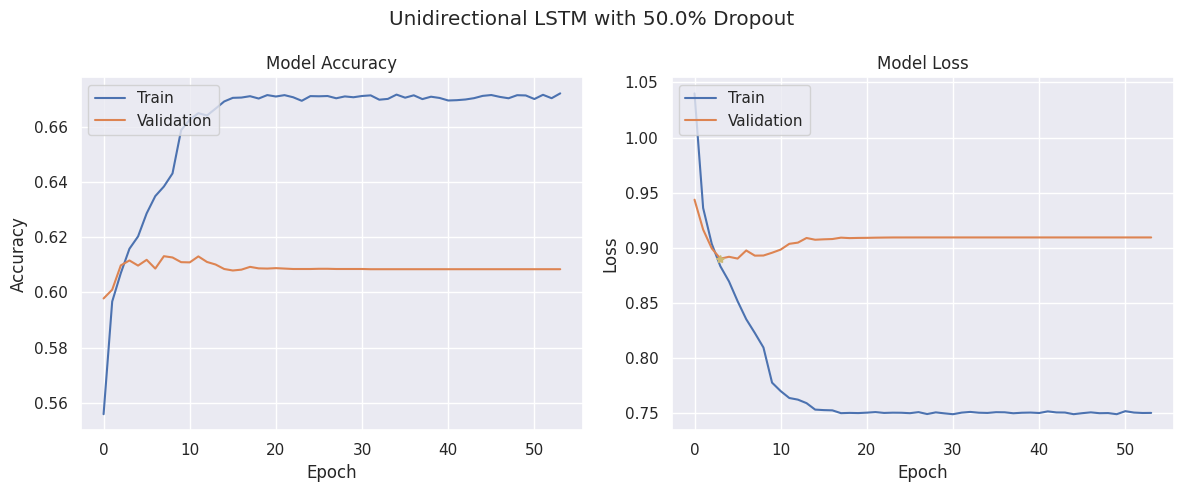

Para o modelo Bidirectional LSTM with 0.0% Dropout:
    Melhor época: 4
    Perda de validação na melhor época: 0.8861755728721619
--------------------------------------


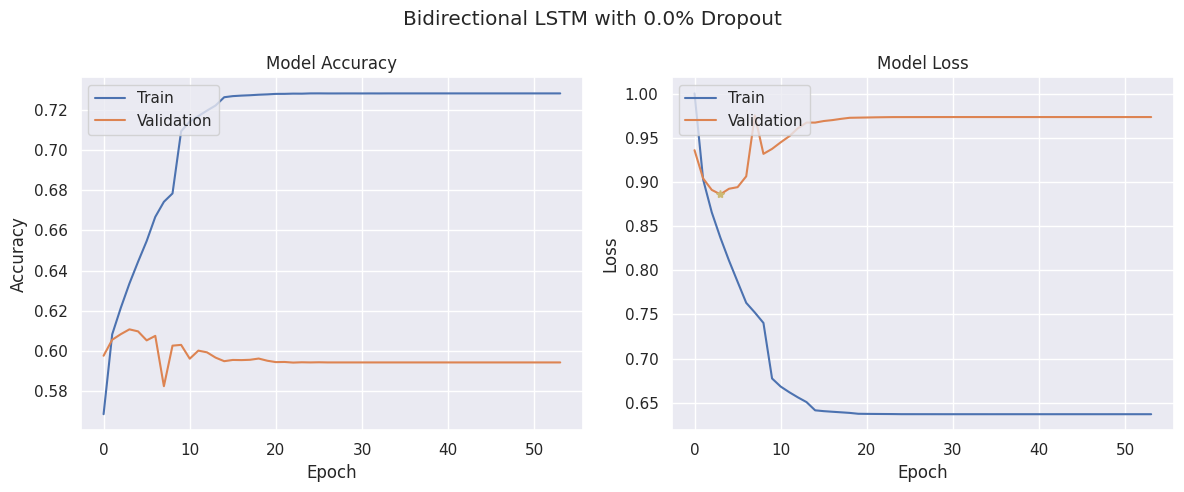

Para o modelo Bidirectional LSTM with 25.0% Dropout:
    Melhor época: 5
    Perda de validação na melhor época: 0.8846947550773621
--------------------------------------


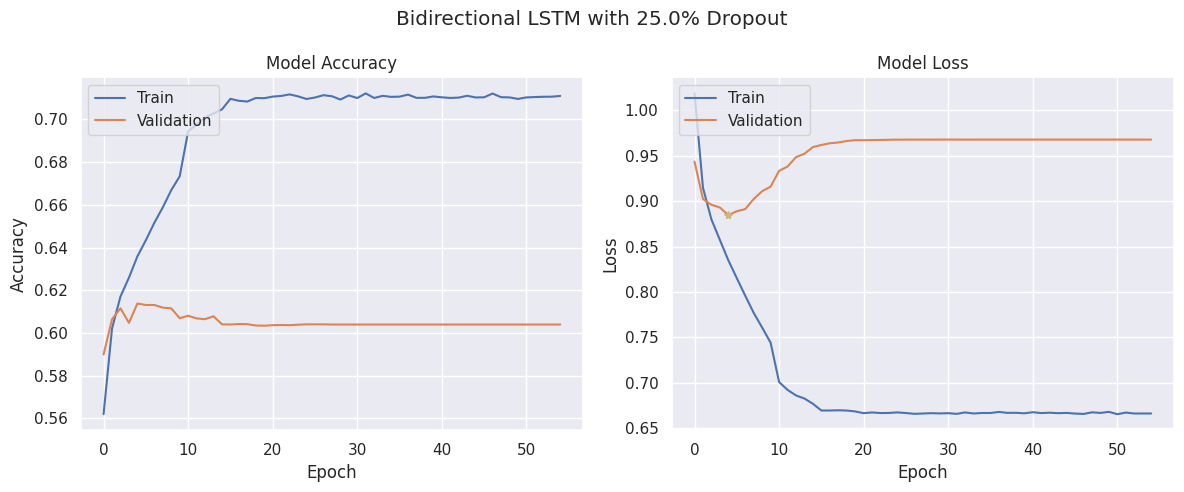

Para o modelo Bidirectional LSTM with 50.0% Dropout:
    Melhor época: 5
    Perda de validação na melhor época: 0.882925271987915
--------------------------------------


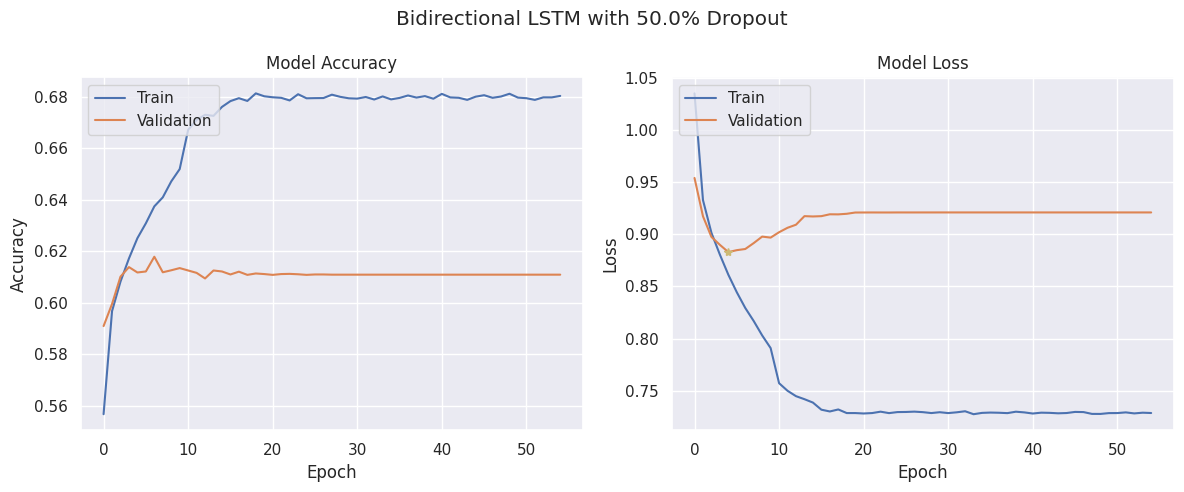



O melhor modelo de todos é: Unidirectional LSTM with 25.0% Dropout (Época: 4) com uma perda de validação de: 0.8822905421257019


In [88]:
sns.set()

def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="*", color="y", label="Best model")
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

best_global_loss = np.inf
best_global_model = ""

for bidir, dropout_rate, history in history_list:
    direction = 'Bidirectional' if bidir else 'Unidirectional'
    title = f'{direction} LSTM with {dropout_rate*100}% Dropout'

    # Encontrar a melhor época para este modelo específico
    best_epoch = np.argmin(history.history['val_loss']) + 1  # +1 porque as listas em Python são baseadas em 0
    best_loss = history.history['val_loss'][best_epoch - 1]  # -1 porque as listas em Python são baseadas em 0

    print(f"Para o modelo {title}:")
    print(f"    Melhor época: {best_epoch}")
    print(f"    Perda de validação na melhor época: {best_loss}")
    print("--------------------------------------")

    # Rastrear o melhor modelo global
    if best_loss < best_global_loss:
        best_global_loss = best_loss
        best_global_model = title + f" (Época: {best_epoch})"

    plot_history(history, title)
print('\n')
print(f"O melhor modelo de todos é: {best_global_model} com uma perda de validação de: {best_global_loss}")


Teste

In [89]:
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

# 1. Carregue o arquivo CSV em um dataframe
test_df = pd.read_csv('teste.csv')

# Assumindo que test_df tenha uma coluna 'review_text' e 'overall_rating'
test_df['review_text'] = test_df['review_text'].fillna('').astype(str)
test_sequences = tokenizer.texts_to_sequences(test_df['review_text'])
X_test = pad_sequences(test_sequences, maxlen=tammax)
y_test = to_categorical(test_df['overall_rating'] - 1, 5)

# Listas para armazenar os resultados
results = []
reports = []

# Configurações dos modelos
combinations = [(bidirectional, dropout_rate) for bidirectional in [False, True] for dropout_rate in [0.0, 0.25, 0.5]]

# 2. Loopar por todos os modelos
for bidirectional, dropout_rate in combinations:
    model_path = f'/content/drive/My Drive/best_model_{bidirectional}_{dropout_rate}.model'
    model = load_model(model_path)

    # Fazer previsões no conjunto X_test
    predicted_probs = model.predict(X_test)
    predicted_classes = np.argmax(predicted_probs, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    # Calcula a acurácia
    accuracy = np.mean(predicted_classes == true_classes)

    # Relatório de classificação
    report = classification_report(true_classes, predicted_classes, output_dict=True, zero_division=0)

    # Prepare a linha do DataFrame
    model_name = f"Bi-{bidirectional}_Drop-{dropout_rate}"
    row = {"Metric": model_name}
    for metric in ['precision', 'recall', 'f1-score', 'support']:
        for cls in range(5):
            row[f'class_{cls}_{metric}'] = report[str(cls)][metric]
        row[f'macro_avg_{metric}'] = report['macro avg'][metric]
        row[f'weighted_avg_{metric}'] = report['weighted avg'][metric]
    reports.append(row)

    # Adiciona ao resultado
    results.append({
        'Bidirectional': bidirectional,
        'Dropout Rate': dropout_rate,
        'Accuracy': accuracy
    })

# 3. Converta os relatórios em DataFrame
reports_df = pd.DataFrame(reports).set_index("Metric").transpose()
results_df = pd.DataFrame(results)

print(results_df)
print(reports_df)


606/606 [==============================] - 3s 4ms/step
   Bidirectional  Dropout Rate  Accuracy
0          False          0.00  0.606042
1          False          0.25  0.609295
2          False          0.50  0.607230
3           True          0.00  0.608882
4           True          0.25  0.607436
5           True          0.50  0.613375
Metric                  Bi-False_Drop-0.0  Bi-False_Drop-0.25  \
class_0_precision                0.760632            0.739965   
class_1_precision                0.386179            0.412698   
class_2_precision                0.414868            0.431019   
class_3_precision                0.478836            0.477424   
class_4_precision                0.639872            0.643008   
macro_avg_precision              0.536077            0.540823   
weighted_avg_precision           0.579449            0.579896   
class_0_recall                   0.870942            0.902608   
class_1_recall                   0.156766            0.171617   
class_2_

In [90]:
display(results_df)
display(reports_df)

,Bidirectional,Dropout Rate,Accuracy
0,False,0.00,0.606042
1,False,0.25,0.609295
2,False,0.50,0.607230
3,True,0.00,0.608882
4,True,0.25,0.607436
5,True,0.50,0.613375


Metric,Bi-False_Drop-0.0,Bi-False_Drop-0.25,Bi-False_Drop-0.5,Bi-True_Drop-0.0,Bi-True_Drop-0.25,Bi-True_Drop-0.5
class_0_precision,0.760632,0.739965,0.752598,0.762115,0.751346,0.742832
class_1_precision,0.386179,0.412698,0.369146,0.373832,0.409326,0.389522
class_2_precision,0.414868,0.431019,0.443545,0.445184,0.443159,0.453699
class_3_precision,0.478836,0.477424,0.475481,0.463420,0.463960,0.474719
class_4_precision,0.639872,0.643008,0.632411,0.666875,0.634742,0.655501
macro_avg_precision,0.536077,0.540823,0.534636,0.542285,0.540507,0.543254
weighted_avg_precision,0.579449,0.579896,0.576757,0.588840,0.576964,0.585744
class_0_recall,0.870942,0.902608,0.886376,0.874667,0.890899,0.903140
class_1_recall,0.156766,0.171617,0.221122,0.231023,0.130363,0.141089
class_2_recall,0.435038,0.411148,0.390193,0.364208,0.369237,0.367561
